<a href="https://colab.research.google.com/github/Muntasir2179/Deep-Learning/blob/Recurrent_Neural_Network-(RNN)/Recurrent_Neural_Network_(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


## Applying standard sclaer on the dataset

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Building the RNN model

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [8]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [9]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 15ms/step - loss: 0.0546
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 13/100
38/38 [====

## Predicting stock price using test set

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []

for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


### Visualizing the result

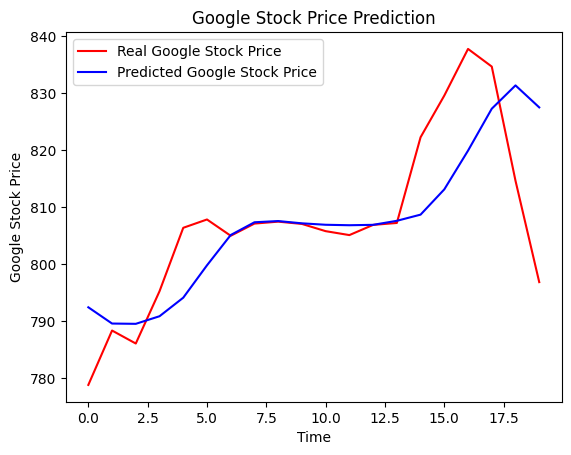

In [18]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()